Mini-Project Motorway Madness 2
<br>velocity and position in seperate arrays

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Initial setup for one lane system:

In [2]:
leng= 200
objects= 30
vmin= 5
vmax= 10
p=0.25 #probability of dawdling
#can be changed

In [3]:
vel= np.zeros(objects) #base array for velocities of inputted number of vehicles

for i in range(len(vel)):
    vel[i]=np.random.randint(vmin,vmax+1) #pick random integer between vmin and vmax (vmax included)

In [4]:
positions= np.zeros(objects) #base array for positions
    
for i in range(objects):
    space= leng/objects
    positions[i]=int(i*space)

implementing rules:

In [5]:
def change(vel,pos):
    """implements the rules: if v<vmax and distance to next car>v+1, v increases by 1; and if driver at i sees driver at i+j,v, v=j-1. Then advances each vehicle by v sites.
    takes inputs of vel: an array of initial velocities and pos: an array of initial positions
    will out put an array of new velocities and an array of new positions"""
    #changing velocity array
    for i in range(objects-1):
        if vel[i]<vmax and pos[i+1]-pos[i]>vel[i]+1:
            vel[i] +=1
        elif pos[i+1]-pos[i]<=vel[i]:
            vel[i]= pos[i+1]-pos[i] -1
            
        num=np.random.random() #picking a random value between 0 and 1
        if num<=p and vel[i]>0:
            vel[i]-=1
            
    
    #below is for the first vehicle
    if vel[objects-1]<vmax and pos[0]-pos[objects-1]+leng>vel[objects-1]+1:
        vel[objects-1] +=1
    elif pos[0]-pos[objects-1]+leng<=vel[objects-1]:
        vel[objects-1]= pos[0]-pos[objects-1]+leng -1
            
    num=np.random.random() #picking a random value between 0 and 1
    if num<=p:
        vel[objects-1]-=1   
    
    
    #changing position array
    for i in range(objects):
        pos[i]+= vel[i]
    
        if pos[i]>leng-1:#-1 because pos[i,0] counts from 0
            pos[i]-=leng #if the length of the track is exceeded take vehicle back to beginning of track
   


    #below rolls the arrays so the vehicles which have gone back to the start of the track are in the right position in the array
    for j in range(1,objects):
        if pos[j]<pos[j-1]:
            pos=np.roll(pos,1)
            vel=np.roll(vel,1)
    
    
    return vel, pos

In [6]:
def basicplot(positions):
    """converts the positions array used for updating the simulation into an array more useful for plotting data.
    Inputs: positions: array of positions for each vehicle
    outputs: an array of length equal to the length of the road, each element will be filled with either 0 or 1, representing empty or occupied"""
    
    array=np.zeros((leng,3)) #need a 2D array to use imshow, 3 used for symmetry
    
    for i in range(objects):
        j=int(positions[i]) #position along length of road
        
        array[j,1]=1 #positions are put in middle column
        
    return array

In [7]:
def velplot(positions,vel):
    """converts the positions and velocity arrays used for updating the simulation into an array more useful for plotting data.
    Inputs: positions: array of positions for each vehicle, vel:array of velocities for each vehicle
    outputs: an array of length equal to the length of the road, each element will be filled with either 0 or a number, representing empty or occupied, the value of the number represents the velocity"""
    
    array=np.zeros((leng,3)) #need a 2D array to use imshow, 3 used for symmetry
    
    for i in range(objects):
        j=int(positions[i]) #position along length of road
        
        array[j,1]=vel[i] + 1 #+1 so vehicles with velocity 0 can still be seen
        
    return array

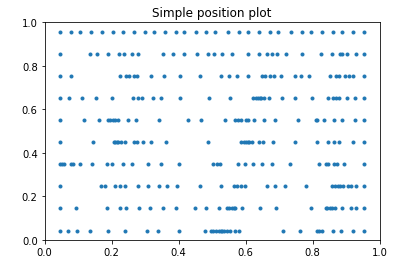

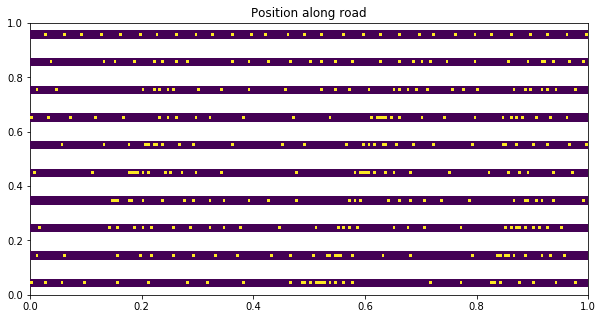

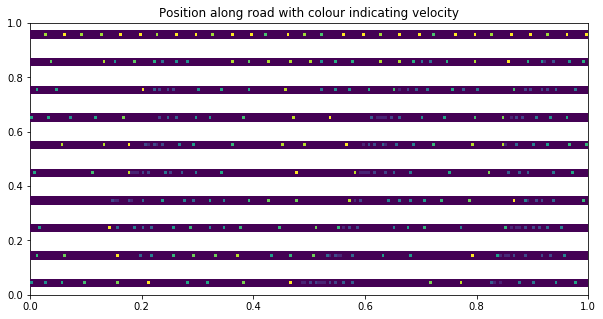

In [8]:
fig=plt.figure()
plt.title("Simple position plot")

figbasic=plt.figure(figsize=(10,5))
plt.title("Position along road")

figvel=plt.figure(figsize=(10,5))
plt.title("Position along road with colour indicating velocity")

index=1 #for subplots

for i in range(100):
    vel, positions= change(vel,positions)
    time=np.zeros(objects)
    time+=i
    
    #plots
    if i%10==0 or i==0:
        #lanes not shown
        ax=fig.add_subplot(10,1,index)
        ax.plot(positions,time,'.')
        ax.set_axis_off()
        
        #basic
        axbasic=figbasic.add_subplot(10,1,index)
        axbasic.imshow(basicplot(positions).T)
        axbasic.set_axis_off()
        
        #vel
        axvel=figvel.add_subplot(10,1,index)
        axvel.imshow(velplot(positions,vel).T)
        axvel.set_axis_off()
        
        index+=1
plt.show()

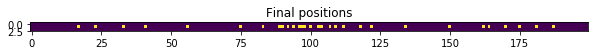

In [9]:
#final positions after 100 iterations:
plot=basicplot(positions)

plt.figure(figsize=(10,15))
plt.imshow(plot.T)
plt.title("Final positions")
plt.show()

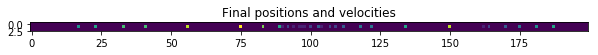

In [10]:
#final positions (and velocities) after 100 iterations
velplot=velplot(positions,vel)

plt.figure(figsize=(10,15))
plt.imshow(velplot.T)
plt.title("Final positions and velocities")
plt.show()

This is the completed, final single lane system.